In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
x = np.linspace(0,50,501)

In [ ]:
y = np.sin(x)

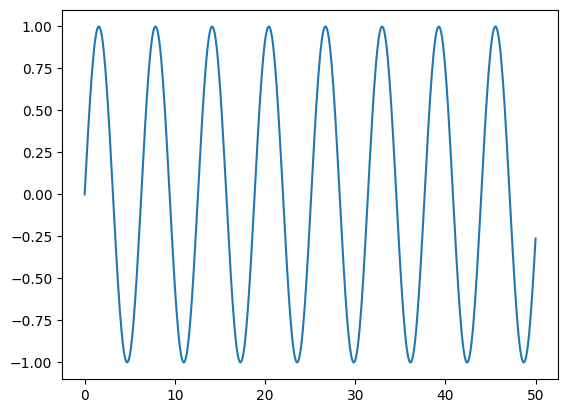

In [ ]:
plt.plot(x,y)

In [ ]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [ ]:
df.head()

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


In [ ]:
len(df)

501

In [ ]:
test_percent = 0.1

In [ ]:
test_point = np.round(len(df)*test_percent)

In [ ]:
test_point

50.0

In [ ]:
test_ind =int(len(df)-test_point)

In [ ]:
train = df.iloc[:test_ind]

In [ ]:
test = df.iloc[test_ind:]

In [ ]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)

In [ ]:
scaled_test = scaler.transform(test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
length = 50
batch_size = 1

generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [ ]:
len(generator)

401

In [ ]:
generator[0]

(array([[[4.99999116e-01],
         [5.49916225e-01],
         [5.99334579e-01],
         [6.47760405e-01],
         [6.94709850e-01],
         [7.39713809e-01],
         [7.82322618e-01],
         [8.22110545e-01],
         [8.58680040e-01],
         [8.91665714e-01],
         [9.20737985e-01],
         [9.45606372e-01],
         [9.66022399e-01],
         [9.81782075e-01],
         [9.92727935e-01],
         [9.98750612e-01],
         [9.99789928e-01],
         [9.95835500e-01],
         [9.86926839e-01],
         [9.73152957e-01],
         [9.54651478e-01],
         [9.31607263e-01],
         [9.04250562e-01],
         [8.72854714e-01],
         [8.37733417e-01],
         [7.99237589e-01],
         [7.57751870e-01],
         [7.13690771e-01],
         [6.67494535e-01],
         [6.19624741e-01],
         [5.70559686e-01],
         [5.20789614e-01],
         [4.70811810e-01],
         [4.21125636e-01],
         [3.72227539e-01],
         [3.24606094e-01],
         [2.78737119e-01],
 

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [ ]:
n_features=1

In [ ]:
model = Sequential()

In [ ]:
model.add(SimpleRNN(50,input_shape=(length,n_features)))

In [ ]:
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit_generator(generator,epochs=5)

Epoch 1/5


<ipython-input-42-063492f5aede>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=5)


401/401 [==============================] - 5s 9ms/step - loss: 0.0131
Epoch 2/5
401/401 [==============================] - 5s 13ms/step - loss: 5.4313e-05
Epoch 3/5
401/401 [==============================] - 3s 8ms/step - loss: 2.6987e-04
Epoch 4/5
401/401 [==============================] - 6s 14ms/step - loss: 1.2813e-04
Epoch 5/5
401/401 [==============================] - 3s 9ms/step - loss: 1.1439e-04


In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

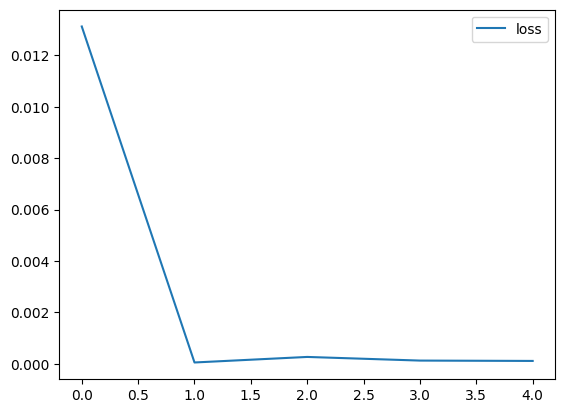

In [ ]:
losses.plot()

In [ ]:
first_eval_batch = scaled_train[-length:]

In [ ]:
first_eval_batch = first_eval_batch.reshape((1,length,n_features))

In [ ]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 364ms/step


array([[0.9484226]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.94955134])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))



In [ ]:
predicted_value = [[[99]]]
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    test_predictions.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 44ms/step


In [ ]:
test_predictions

[array([0.9484226], dtype=float32),
 array([0.966933], dtype=float32),
 array([0.9811363], dtype=float32),
 array([0.99011105], dtype=float32),
 array([0.99430346], dtype=float32),
 array([0.993704], dtype=float32),
 array([0.98866427], dtype=float32),
 array([0.97881585], dtype=float32),
 array([0.9643467], dtype=float32),
 array([0.94606614], dtype=float32),
 array([0.92352015], dtype=float32),
 array([0.89717644], dtype=float32),
 array([0.8670141], dtype=float32),
 array([0.8334981], dtype=float32),
 array([0.7974882], dtype=float32),
 array([0.7587438], dtype=float32),
 array([0.71775556], dtype=float32),
 array([0.67485106], dtype=float32),
 array([0.630788], dtype=float32),
 array([0.5855009], dtype=float32),
 array([0.538999], dtype=float32),
 array([0.49246627], dtype=float32),
 array([0.4459798], dtype=float32),
 array([0.39977017], dtype=float32),
 array([0.3541805], dtype=float32),
 array([0.30995885], dtype=float32),
 array([0.26786652], dtype=float32),
 array([0.22775011]

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

<ipython-input-56-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [ ]:
test

,Sine,Predictions
45.1,0.899097,0.896840
45.2,0.938307,0.933860
45.3,0.968142,0.962267
45.4,0.988304,0.980216
45.5,0.998591,0.988601
45.6,0.998900,0.987402
45.7,0.989229,0.977322
45.8,0.969673,0.957626
45.9,0.940429,0.928688
46.0,0.901788,0.892127


<Axes: >

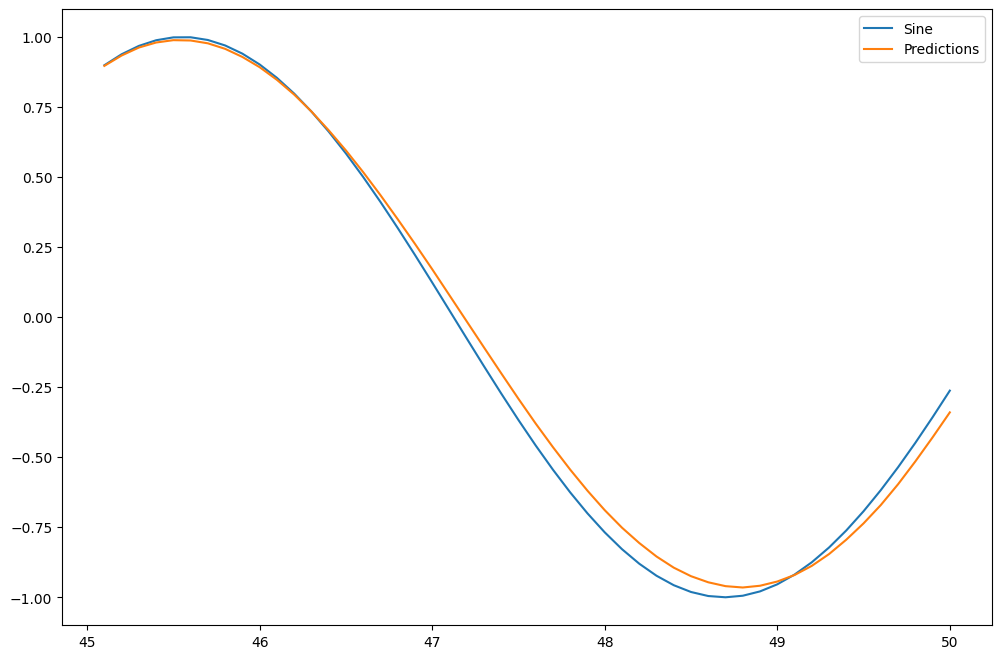

In [ ]:
test.plot(figsize=(12,8))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
length = 49
generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length=length,batch_size=1)

validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [ ]:
model = Sequential()

# Simple RNN layer
model.add(LSTM(50,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit_generator(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/20


<ipython-input-66-95afb4e45afd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop])


402/402 [==============================] - 13s 27ms/step - loss: 0.0112 - val_loss: 1.0847e-04
Epoch 2/20
402/402 [==============================] - 10s 24ms/step - loss: 8.6644e-05 - val_loss: 1.6608e-04
Epoch 3/20
402/402 [==============================] - 7s 18ms/step - loss: 2.2010e-04 - val_loss: 5.7932e-05
Epoch 4/20
402/402 [==============================] - 9s 21ms/step - loss: 1.2103e-04 - val_loss: 2.8326e-06
Epoch 5/20
402/402 [==============================] - 9s 23ms/step - loss: 2.2317e-04 - val_loss: 1.0300e-04
Epoch 6/20
402/402 [==============================] - 7s 18ms/step - loss: 1.1819e-04 - val_loss: 3.2549e-06


In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    test_predictions.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 25ms/step


<ipython-input-68-0c99d0b30835>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = true_predictions


<Axes: >

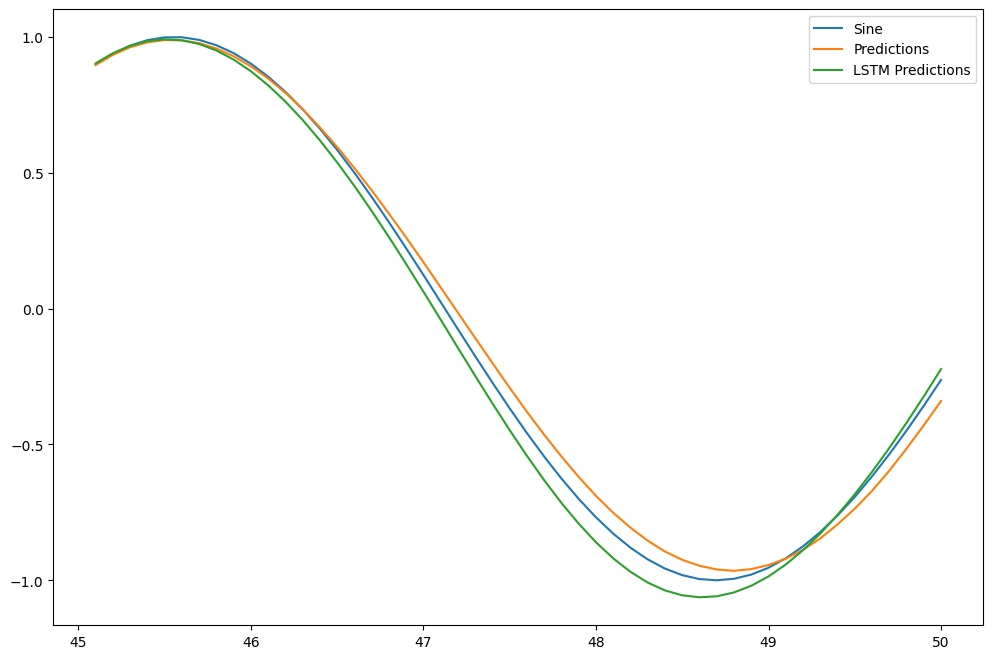

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12,8))

In [ ]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [ ]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator,epochs=6)

Epoch 1/6


<ipython-input-71-ee2f981b94f1>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=6)


451/451 [==============================] - 14s 19ms/step - loss: 0.0094
Epoch 2/6
451/451 [==============================] - 11s 25ms/step - loss: 3.6762e-04
Epoch 3/6
451/451 [==============================] - 11s 24ms/step - loss: 2.4057e-04
Epoch 4/6
451/451 [==============================] - 8s 19ms/step - loss: 2.0350e-04
Epoch 5/6
451/451 [==============================] - 11s 24ms/step - loss: 2.6475e-04
Epoch 6/6
451/451 [==============================] - 9s 19ms/step - loss: 1.0911e-04


In [ ]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    forecast.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 37ms/step


In [ ]:
forecast = scaler.inverse_transform(forecast)

In [ ]:
forecast_index = np.arange(50.1,55.1,step=0.1)

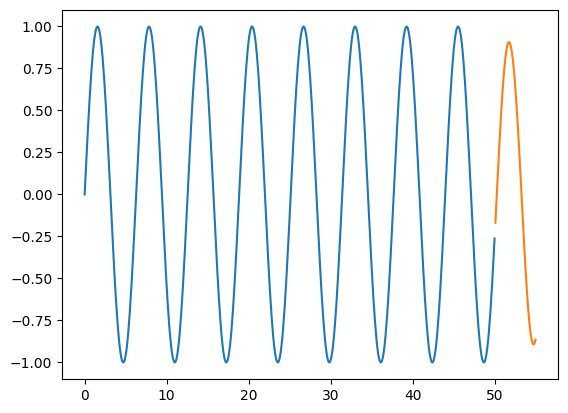

In [ ]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index,forecast)